## Import Liberaries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Load Data

In [2]:
Gold_Data = pd.read_csv("gld_price_data.csv")

## Data Pre Processing

In [3]:
Gold_Data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
Gold_Data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
Gold_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
Gold_Data['Date'] = pd.to_datetime(Gold_Data['Date'], format='%m/%d/%Y')


In [7]:
Gold_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [8]:
Gold_Data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Checking Correlation

##### 1. Positive Correlation
##### 2. Negtive Correlation

In [9]:
correlation = Gold_Data.corr()

<Axes: >

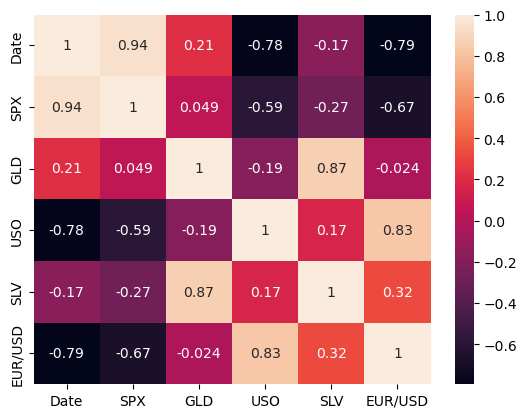

In [10]:
sns.heatmap(data = correlation,annot=True)

In [11]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [12]:
Gold_Data.drop(columns='Date',axis=1)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


<Axes: xlabel='GLD', ylabel='Density'>

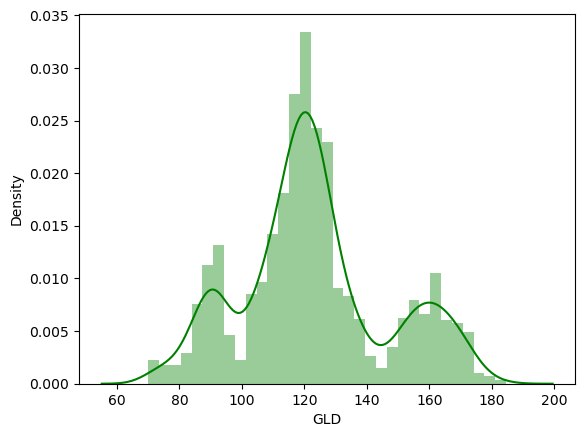

In [13]:
# checking the distribution of the GLD Price
sns.distplot(Gold_Data['GLD'],color='green')

## Segregeting X and y

In [14]:
X = Gold_Data.drop(["GLD","Date"],axis =1)
y = Gold_Data["GLD"]

In [15]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [16]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

## Train Split Test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)

print("-"*30)

print("X_test shape :",X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape : (1832, 4)
y_train shape : (1832,)
------------------------------
X_test shape : (458, 4)
y_test shape : (458,)


## Build the Model

### Using Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model = RandomForestRegressor(n_estimators=100)

In [21]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
y_pred = model.predict(X_test)


In [23]:
pd.DataFrame(y_pred,columns=['Predicted'])

,Predicted
0,113.207400
1,147.273901
2,139.206298
3,112.638602
4,113.918600
...,...
453,115.571899
454,101.163598
455,129.596498
456,165.055598


In [24]:
pd.DataFrame(y_test)

,GLD
1971,110.820000
1163,151.050003
693,137.660004
1651,113.070000
508,114.629997
...,...
1524,115.779999
363,98.900002
1272,130.559998
1053,164.860001


## Evalution Matrics

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [26]:
print("mean absolute error : ",mean_absolute_error(y_test,y_pred))
print("mean squared error : ",mean_squared_error(y_test,y_pred))
print("root mean squared error : ",root_mean_squared_error(y_test,y_pred))
print("R squared error : ",r2_score(y_test,y_pred))


mean absolute error :  1.2703565508951964
mean squared error :  6.513854942298864
root mean squared error :  2.552225488137532
R squared error :  0.9876573180130552


In [27]:
Y_test = list(y_test)

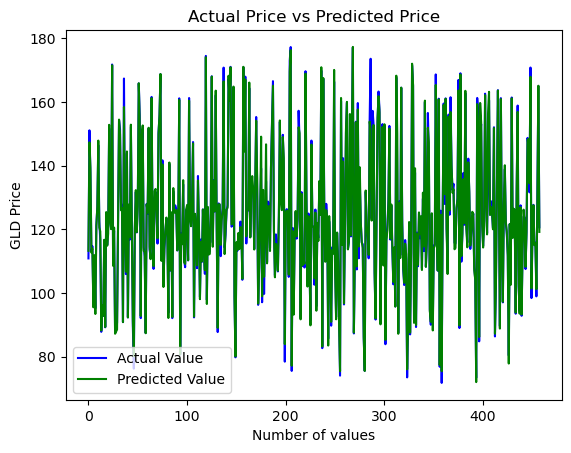

In [28]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

- Actual Value and predicted values are slightly diffrents And  R square we have 0.98 that means our model performing well

## Making Prediction  System

In [38]:
input_data = (1447.160034,78.370003,15.2850,1.474491)
input_data_as_numpy = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy.reshape(1,-1)

Predicted  = model.predict(input_data_reshaped)
print(Predicted)

[85.55729996]
